# Analyse de la Relation Employés - Clients
## Matrice d'Intensité des Commandes

Ce notebook analyse les relations entre employés et clients en visualisant l'intensité des commandes via une heatmap.

### 1. Importation des bibliothèques

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Configuration pour un meilleur affichage
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

### 2. Chargement des données

In [ ]:
# Chargement des trois tables CSV


# Table des faits
fait = pd.read_csv('../data/Fait_Commandes.csv')

# Table dimension Client
dim_client = pd.read_csv('../data/Dim_Client.csv')

# Table dimension Employee
dim_employee = pd.read_csv('../data/Dim_Employee.csv')

print("Dimensions des tables chargées:")
print(f"Fait: {fait.shape}")
print(f"Dim_Client: {dim_client.shape}")
print(f"Dim_Employee: {dim_employee.shape}")

Dimensions des tables chargées:
Fait: (4938, 6)
Dim_Client: (120, 6)
Dim_Employee: (58, 8)


### 3. Exploration des données

In [ ]:
# Aperçu de la table des faits
print("=== Table Fait ===")
print(fait.head())
print("\nInfo:")
print(fait.info())

=== Table Fait ===
   idSeqFait  Dim_Temps.id_temps  Dim_Client.id_seqClient  \
0          1                   1                       85   
1          2                   1                       85   
2          3                   1                       85   
3          4                   1                       85   
4          5                   1                       85   

   Dim_Employee.id_seqEmployee  Somme de nbr_commandes_livrees  \
0                           17                               1   
1                           18                               1   
2                           19                               1   
3                           20                               1   
4                           21                               1   

   Somme de nbr_commandes_non_livrees  
0                                   0  
1                                   0  
2                                   0  
3                                   0  
4                

In [ ]:
# Aperçu de la dimension Client
print("=== Dimension Client ===")
print(dim_client.head())
print("\nNombre de clients uniques:", dim_client['id_seqClient'].nunique())

=== Dimension Client ===
  id_client_prod  id_seqClient       City CompanyName Country source_prod 
0              1            92    Seattle   Company A     USA        Acess
1             10           101    Chicago   Company J     USA        Acess
2             11           102      Miami   Company K     USA        Acess
3             12           103  Las Vegas   Company L     USA        Acess
4             13           104    Memphis   Company M     USA        Acess

Nombre de clients uniques: 120


In [ ]:
# Aperçu de la dimension Employee
print("=== Dimension Employee ===")
print(dim_employee.head())
print("\nNombre d'employés uniques:", dim_employee['id_seqEmployee'].nunique())

=== Dimension Employee ===
   id_seqEmployee  id_employee_prod      Nom  Prenom   Region source_prod   \
0               1                 1  Davolio   Nancy  Eastern   Sql_server   
1               2                 1  Davolio   Nancy  Eastern   Sql_server   
2               3                 2   Fuller  Andrew  Eastern   Sql_server   
3               4                 2   Fuller  Andrew  Eastern   Sql_server   
4               5                 2   Fuller  Andrew  Eastern   Sql_server   

   Territory TerritoryDescn  
0     6897.0         Wilton  
1    19713.0         Neward  
2     1581.0       Westboro  
3     1730.0        Bedford  
4     1833.0      Georgetow  

Nombre d'employés uniques: 58


### 4. Préparation des données - Jointures

In [ ]:
# Renommage des colonnes pour correspondre au code Power BI
fait = fait.rename(columns={
    'Dim_Client.id_seqClient': 'id_seqClient',
    'Dim_Employee.id_seqEmployee': 'id_seqEmployee',
    'Somme de nbr_commandes_livrees': 'nbr_commande_livrees',
    'Somme de nbr_commandes_non_livrees': 'nbr_commande_non_livrees'
})

# Jointure avec la dimension Employee pour obtenir Nom et Prenom
dataset = fait.merge(dim_employee[['id_seqEmployee', 'Nom', 'Prenom']], 
                     on='id_seqEmployee', 
                     how='left')

# Jointure avec la dimension Client pour obtenir CompanyName
dataset = dataset.merge(dim_client[['id_seqClient', 'CompanyName']], 
                        on='id_seqClient', 
                        how='left')

# Suppression des doublons (comme dans Power BI)
dataset = dataset.drop_duplicates()

print("Dataset après jointures:")
print(dataset.head())
print(f"\nShape: {dataset.shape}")

Dataset après jointures:
   idSeqFait  Dim_Temps.id_temps  id_seqClient  id_seqEmployee  \
0          1                   1            85              17   
1          2                   1            85              18   
2          3                   1            85              19   
3          4                   1            85              20   
4          5                   1            85              21   

   nbr_commande_livrees  nbr_commande_non_livrees       Nom  Prenom  \
0                     1                         0  Buchanan  Steven   
1                     1                         0  Buchanan  Steven   
2                     1                         0  Buchanan  Steven   
3                     1                         0  Buchanan  Steven   
4                     1                         0  Buchanan  Steven   

                 CompanyName  
0  Vins et alcools Chevalier  
1  Vins et alcools Chevalier  
2  Vins et alcools Chevalier  
3  Vins et alcools Chevalie

### 5. Calcul et agrégation

In [ ]:
# Copie du dataset
df = dataset.copy()

# Calcul du total des commandes par relation Employé–Client
df['Total_Commandes'] = df['nbr_commande_livrees'] + df['nbr_commande_non_livrees']

# Agrégation par Employé (Nom) et Client (CompanyName)
relation = df.groupby(['Nom', 'CompanyName'])['Total_Commandes'].sum().reset_index()

print("Relation Employé-Client agrégée:")
print(relation.head(10))
print(f"\nNombre de relations: {len(relation)}")

Relation Employé-Client agrégée:
        Nom               CompanyName  Total_Commandes
0  Buchanan        Berglunds snabbköp               14
1  Buchanan  Blondesddsl père et fils                7
2  Buchanan                  Bon app'                7
3  Buchanan         Chop-suey Chinese                7
4  Buchanan        Familia Arquibaldo                7
5  Buchanan            Folk och fä HB                7
6  Buchanan            Frankenversand                7
7  Buchanan       Godos Cocina Típica               14
8  Buchanan             Hanari Carnes                7
9  Buchanan         LILA-Supermercado               14

Nombre de relations: 978


In [ ]:
# Statistiques descriptives
print("Statistiques sur le total des commandes:")
print(relation['Total_Commandes'].describe())

print("\nTop 10 des relations Employé-Client (par nombre de commandes):")
print(relation.nlargest(10, 'Total_Commandes'))

Statistiques sur le total des commandes:
count    978.000000
mean       5.169734
std        5.422179
min        1.000000
25%        1.000000
50%        3.000000
75%        7.000000
max       42.000000
Name: Total_Commandes, dtype: float64

Top 10 des relations Employé-Client (par nombre de commandes):
           Nom          CompanyName  Total_Commandes
364     Fuller           QUICK-Stop               42
490       King         Ernst Handel               40
493       King  Godos Cocina Típica               30
495       King     HILARION-Abastos               30
498       King  Lehmanns Marktstand               30
507       King        Queen Cozinha               30
511       King   Save-a-lot Markets               30
513       King        Simons bistro               30
240  Dodsworth      Königlich Essen               28
372     Fuller   Save-a-lot Markets               28


### 6. Création de la matrice pivot pour la heatmap

In [ ]:
# Pivot pour heatmap
pivot = relation.pivot(index='Nom', columns='CompanyName', values='Total_Commandes').fillna(0)

print(f"Dimensions de la matrice pivot: {pivot.shape}")
print(f"Employés: {pivot.shape[0]}")
print(f"Clients: {pivot.shape[1]}")
print("\nAperçu de la matrice pivot:")
print(pivot.iloc[:5, :5])

Dimensions de la matrice pivot: (18, 104)
Employés: 18
Clients: 104

Aperçu de la matrice pivot:
CompanyName  Alfreds Futterkiste  Ana Trujillo Emparedados y helados  \
Nom                                                                    
Buchanan                     0.0                                 0.0   
Callahan                     0.0                                 0.0   
Cencini                      0.0                                 0.0   
Davolio                      4.0                                 0.0   
Dodsworth                    0.0                                 0.0   

CompanyName  Antonio Moreno Taquería  Around the Horn  B's Beverages  
Nom                                                                   
Buchanan                         0.0              0.0            0.0  
Callahan                         0.0              4.0            0.0  
Cencini                          0.0              0.0            1.0  
Davolio                          2.0       

### 7. Visualisation - Heatmap

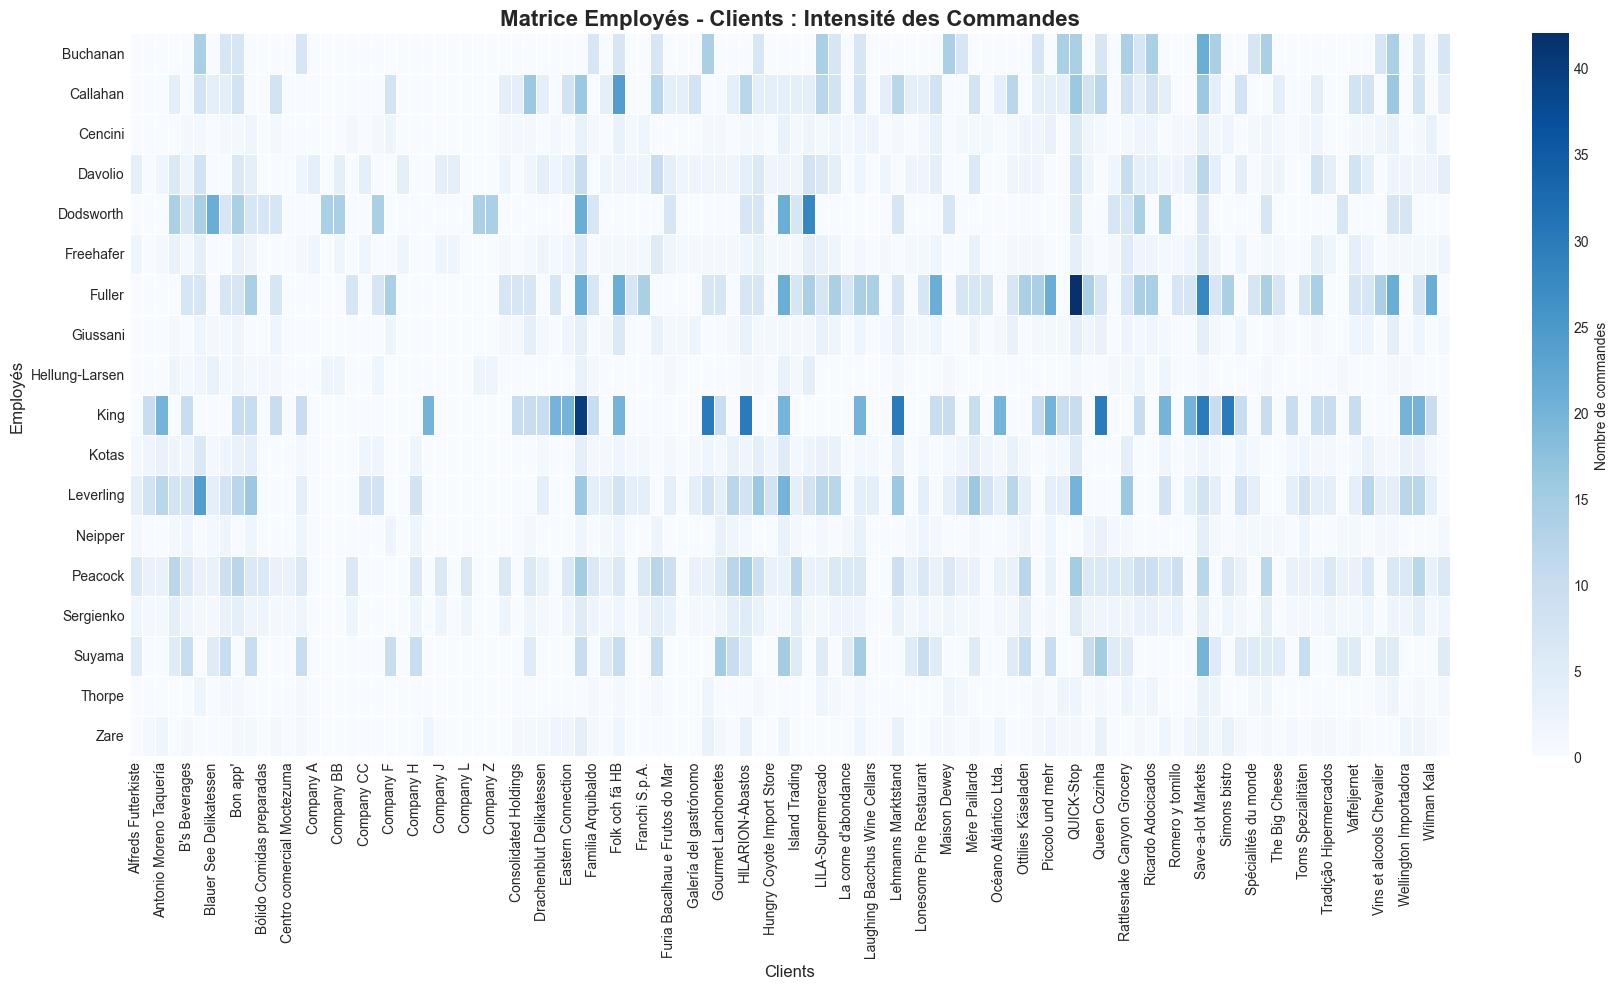

In [ ]:
# Création de la heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(pivot, cmap="Blues", linewidths=.5, annot=False, fmt=".0f", cbar_kws={'label': 'Nombre de commandes'})

plt.title("Matrice Employés - Clients : Intensité des Commandes", fontsize=16, fontweight='bold')
plt.xlabel("Clients", fontsize=12)
plt.ylabel("Employés", fontsize=12)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

### 8. Analyses complémentaires

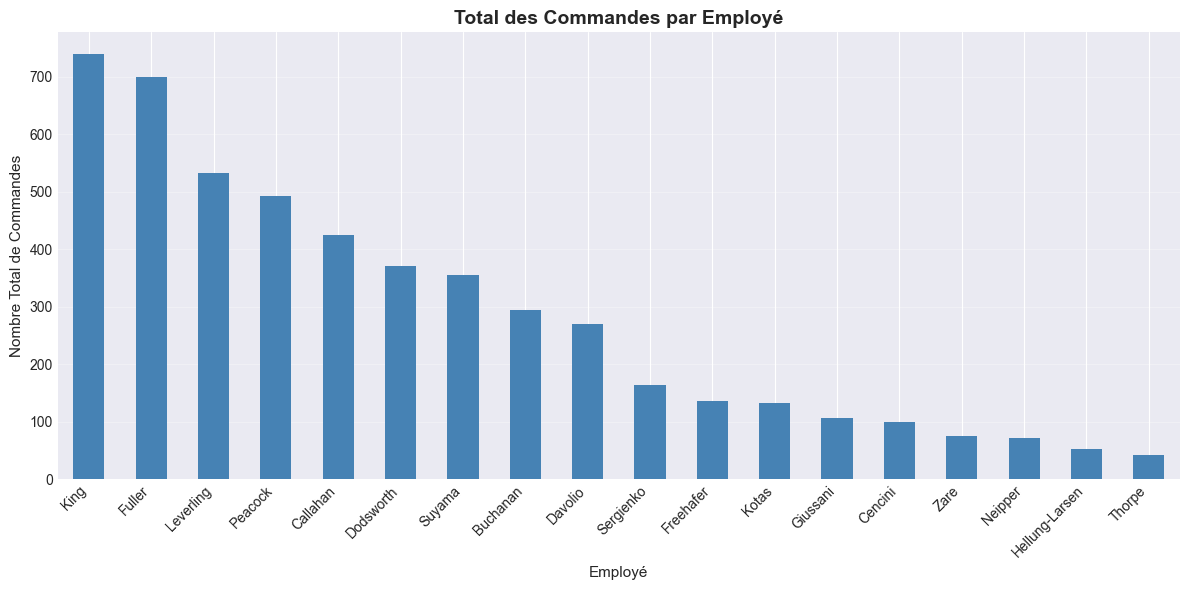


Top 5 des employés par nombre de commandes:
Nom
King         740
Fuller       700
Leverling    532
Peacock      492
Callahan     424
Name: Total_Commandes, dtype: int64


In [ ]:
# Total de commandes par employé
commandes_par_employe = relation.groupby('Nom')['Total_Commandes'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
commandes_par_employe.plot(kind='bar', color='steelblue')
plt.title('Total des Commandes par Employé', fontsize=14, fontweight='bold')
plt.xlabel('Employé', fontsize=11)
plt.ylabel('Nombre Total de Commandes', fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nTop 5 des employés par nombre de commandes:")
print(commandes_par_employe.head())

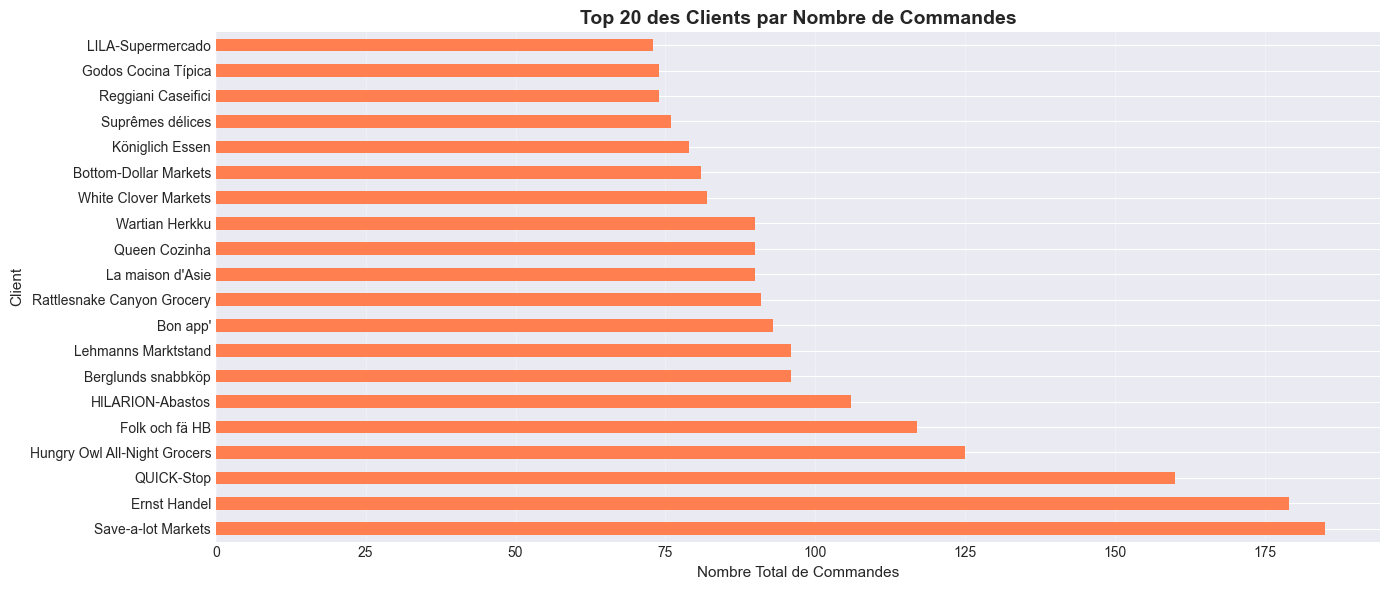


Top 10 des clients par nombre de commandes:
CompanyName
Save-a-lot Markets              185
Ernst Handel                    179
QUICK-Stop                      160
Hungry Owl All-Night Grocers    125
Folk och fä HB                  117
HILARION-Abastos                106
Berglunds snabbköp               96
Lehmanns Marktstand              96
Bon app'                         93
Rattlesnake Canyon Grocery       91
Name: Total_Commandes, dtype: int64


In [ ]:
# Total de commandes par client
commandes_par_client = relation.groupby('CompanyName')['Total_Commandes'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
commandes_par_client.head(20).plot(kind='barh', color='coral')
plt.title('Top 20 des Clients par Nombre de Commandes', fontsize=14, fontweight='bold')
plt.xlabel('Nombre Total de Commandes', fontsize=11)
plt.ylabel('Client', fontsize=11)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nTop 10 des clients par nombre de commandes:")
print(commandes_par_client.head(10))